In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

In [49]:
df = pd.read_csv('finance asw.csv')
print(df.head())

   ID  Penghasilan (IDR)  Hutang (IDR)  Tabungan (IDR)  \
0   1           12839457       2925049         5842103   
1   2           14893045      11325549         2341825   
2   3           12488194        172022         4379325   
3   4           11510816       5371872          908255   
4   5           12802262      14623210         8084344   

   Pengeluaran Bulanan (IDR)  Rasio Hutang/Penghasilan  Investasi (IDR)  \
0                    6829952                      0.23          1274043   
1                   10605743                      0.76           262360   
2                    7795875                      0.01           159949   
3                    4604322                      0.47           237754   
4                    9931085                      1.14           346102   

  Skor Finansial  
0    Sangat Baik  
1          Buruk  
2    Sangat Baik  
3           Baik  
4          Buruk  


## EDA

In [6]:
# Menampilkan jumlah baris dan kolom
jumlah_baris = df.shape[0]
jumlah_kolom = df.shape[1]
print(f"Jumlah baris: {jumlah_baris}")
print(f"Jumlah kolom: {jumlah_kolom}")

# Menampilkan informasi tipe data setiap kolom
print(df.dtypes)

Jumlah baris: 500
Jumlah kolom: 8
ID                             int64
Penghasilan (IDR)              int64
Hutang (IDR)                   int64
Tabungan (IDR)                 int64
Pengeluaran Bulanan (IDR)      int64
Rasio Hutang/Penghasilan     float64
Investasi (IDR)                int64
Skor Finansial                object
dtype: object


In [7]:
print(df.isnull().sum())
# Tidak ditemukan data missing atau hilang

ID                           0
Penghasilan (IDR)            0
Hutang (IDR)                 0
Tabungan (IDR)               0
Pengeluaran Bulanan (IDR)    0
Rasio Hutang/Penghasilan     0
Investasi (IDR)              0
Skor Finansial               0
dtype: int64


        ID  Penghasilan (IDR)  Hutang (IDR)  Tabungan (IDR)  \
count  500                500           500             500   
mean   250           13554436       5539154         3496730   
std    144            2023794       3485364         1115774   
min      1            6423890        113579          464039   
25%    125           11928374       2345678         2345678   
50%    250           13456789       7654321         3456789   
75%    375           14895673       8765432         4567890   
max    500           18765432      14623210         8765432   

       Pengeluaran Bulanan (IDR)  Rasio Hutang/Penghasilan  Investasi (IDR)  
count                        500                500.000000              500  
mean                     9790675                  0.404460           161830  
std                      1898147                  0.252985            91141  
min                      3195825                  0.010000            82670  
25%                      7890123          

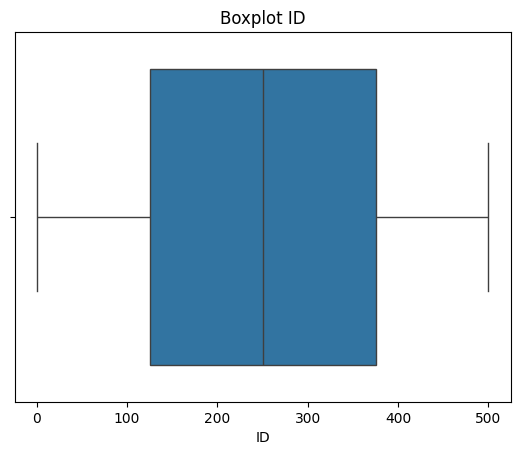

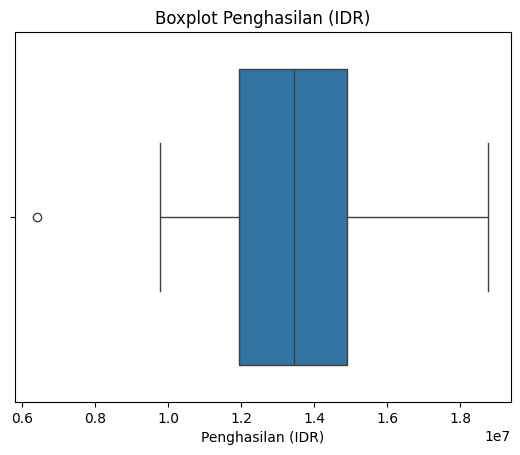

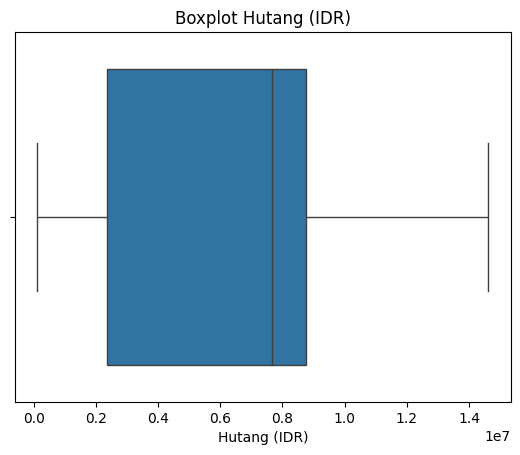

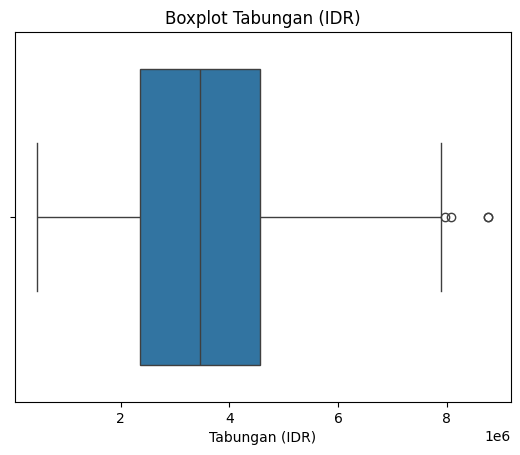

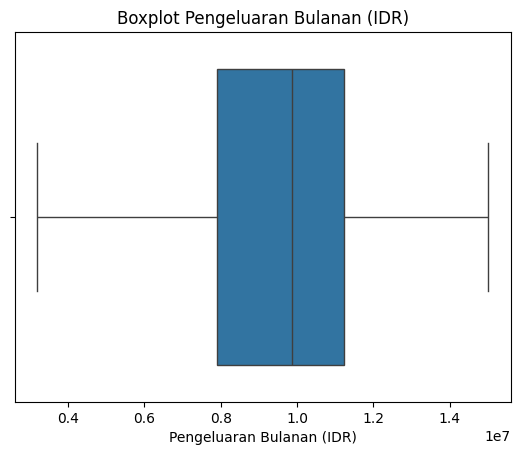

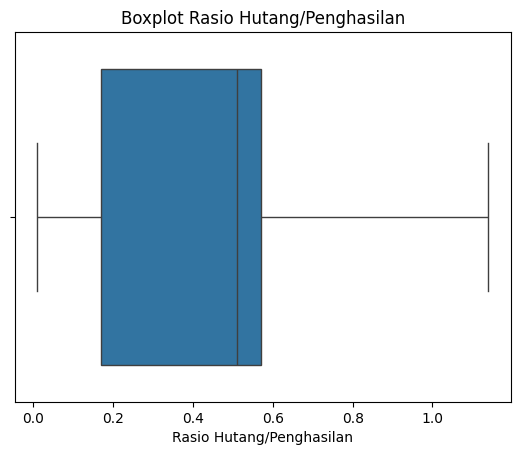

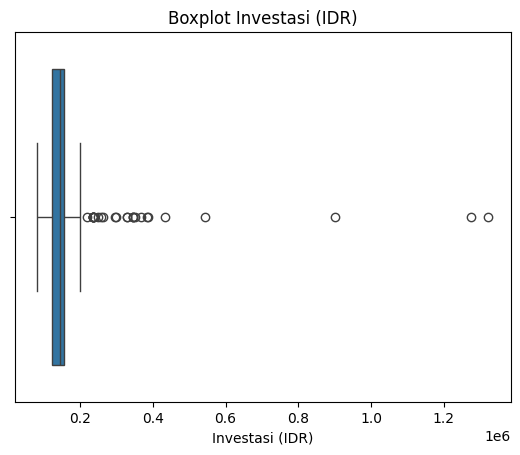

In [12]:
# Analisis Distribusi dan Korelasi
describe_df = df.describe()

# Mengubah tipe data kolom yang tidak mengandung desimal menjadi integer
for column in describe_df.columns:
    if df[column].dtype == 'int64':
        describe_df[column] = describe_df[column].astype(int)
print(describe_df)

# Visualisasi distribusi data numerik dengan boxplot
for column in df.select_dtypes(include='number').columns:
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot {column}')
    plt.show()

In [13]:
# Cek jumlah data duplikat
print("Jumlah duplikasi:", df.duplicated().sum())

Jumlah duplikasi: 0


## Preprocess


In [65]:
X = df.drop('Skor Finansial', axis=1)  # Features
y = df['Skor Finansial']  # Target variable

In [66]:
label_encoder = LabelEncoder()
df['Skor Finansial'] = label_encoder.fit_transform(df['Skor Finansial'])

# b. One-Hot Encoding for categorical features:
categorical_features = X.select_dtypes(include=['object']).columns
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

# c. Scaling for numerical features:
numerical_features = X_encoded.select_dtypes(include=['number']).columns
scaler = StandardScaler()
X_encoded[numerical_features] = scaler.fit_transform(X_encoded[numerical_features])

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
numerical_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

In [45]:
# Preprocessing untuk kolom numerik
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# Preprocessing untuk kolom kategorikal
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan preprocessing numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [54]:
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

## Models


In [68]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'SVM': SVR(),
    'XGBoost': XGBRegressor(random_state=42)
}

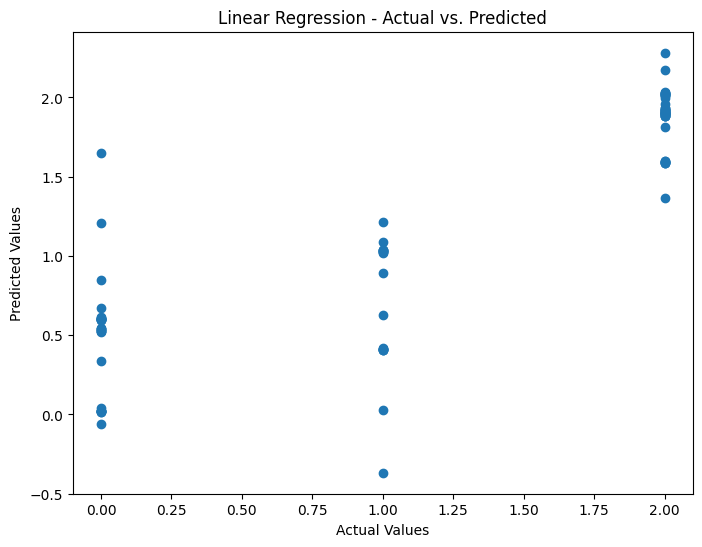

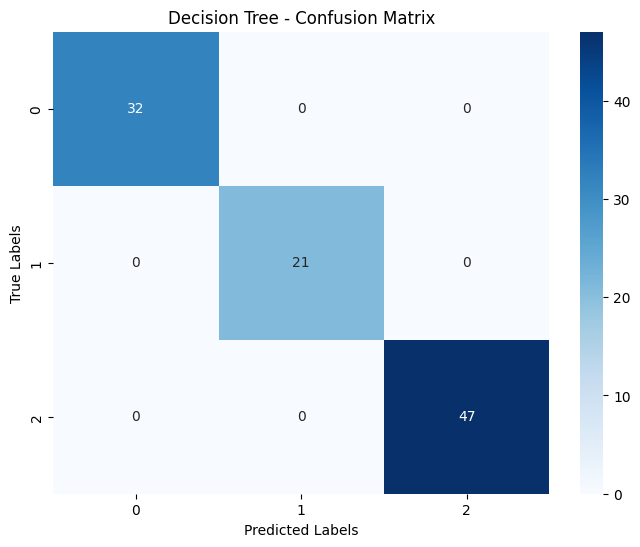

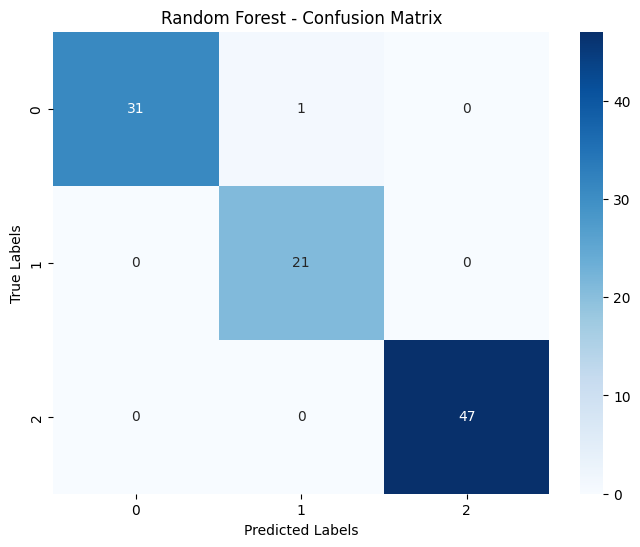

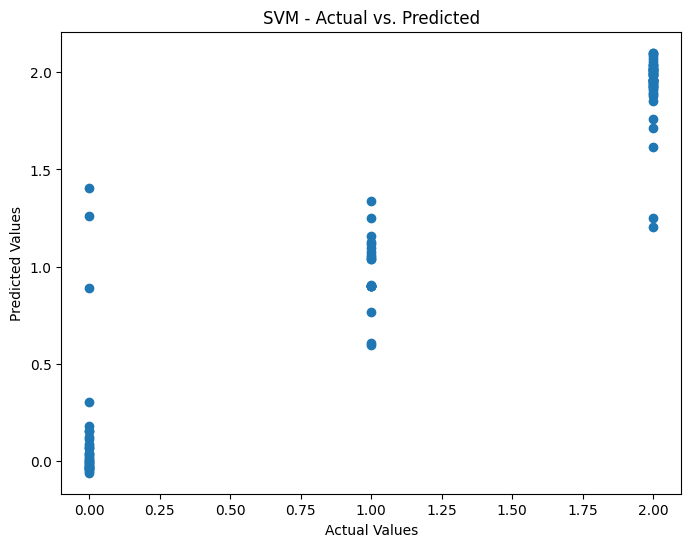

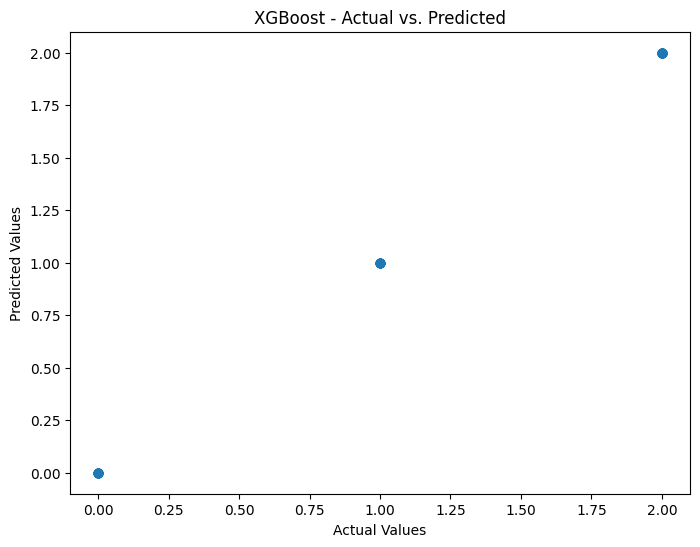

               Model            Type  MSE/Accuracy  R2/F1-Score
0  Linear Regression      Regression  1.894194e-01     0.753200
1      Decision Tree  Classification  1.000000e+00     1.000000
2      Random Forest  Classification  9.900000e-01     0.990037
3                SVM      Regression  6.942217e-02     0.909548
4            XGBoost      Regression  2.975343e-09     1.000000


In [72]:
results = []
for model_name, model in models.items():
    if model_name in ['Linear Regression', 'SVM', 'XGBoost']:  # Regression models
        y_pred = model.predict(X_test_preprocessed)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results.append([model_name, 'Regression', mse, r2])

        # Visualisasi untuk model regresi (contoh: scatter plot)
        plt.figure(figsize=(8, 6))
        plt.scatter(y_test, y_pred)
        plt.xlabel("Actual Values")
        plt.ylabel("Predicted Values")
        plt.title(f"{model_name} - Actual vs. Predicted")
        plt.show()

    else:  # Classification models (Decision Tree, Random Forest)
        y_pred = model.predict(X_test_preprocessed)
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred, output_dict=True)
        results.append([model_name, 'Classification', accuracy, report['weighted avg']['f1-score']])

        # Visualisasi untuk model klasifikasi (contoh: confusion matrix)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
        plt.xlabel("Predicted Labels")
        plt.ylabel("True Labels")
        plt.title(f"{model_name} - Confusion Matrix")
        plt.show()

# Create a DataFrame for comparison
results_df = pd.DataFrame(results, columns=['Model', 'Type', 'MSE/Accuracy', 'R2/F1-Score'])
print(results_df)

In [80]:
new_data = pd.DataFrame({
    'ID': [1, 2, 3],  # Example values, adjust as needed
    'Penghasilan (IDR)': [3000000, 6000000, 9000000],
    'Pengeluaran Bulanan (IDR)': [2000000, 3500000, 5000000],
    'Tabungan (IDR)': [1000000, 2500000, 4000000],  # Example values
    'Investasi (IDR)': [0, 500000, 1000000],  # Example values
    'Hutang (IDR)': [10000000, 25000000, 40000000],
    'Rasio Hutang/Penghasilan': [3.33, 4.17, 4.44],  # Example values
    'Total Aset': [50000000, 120000000, 200000000],
    'Total Hutang': [10000000, 25000000, 40000000],
    'Riwayat Kredit': ['Cukup', 'Baik', 'Sangat Baik'],
    'Jumlah Tanggungan': [1, 2, 4]
})

In [86]:
new_data_preprocessed = preprocessor.transform(new_data)

# Pilih model yang ingin digunakan (misalnya, Random Forest)
selected_model = models['Linear Regression']
unique_labels = label_encoder.classes_

# Map predictions to nearest encoded label using argmin for distance
mapped_predictions = [unique_labels[np.argmin(np.abs(unique_labels - pred))] for pred in predictions]

# Tampilkan hasil prediksi
print("Prediksi Skor Finansial (Label Asli):")
print(label_encoder.inverse_transform(mapped_predictions))
# --- End of changes ---

Prediksi Skor Finansial (Label Asli):
[2 2 2]


In [87]:
new_data_preprocessed = preprocessor.transform(new_data)

# Pilih model yang ingin digunakan (misalnya, Random Forest)
selected_model = models['Random Forest']

# Lakukan prediksi
predictions = selected_model.predict(new_data_preprocessed)

# Ubah hasil prediksi menjadi label kategori
label_mapping = {
    0: "Buruk",
    1: "Baik",
    2: "Sangat Baik"
}

predicted_labels = [label_mapping[prediction] for prediction in predictions]

# Tampilkan hasil prediksi
print("Prediksi Skor Finansial:")
print(predicted_labels)

Prediksi Skor Finansial:
['Baik', 'Baik', 'Baik']
